In [29]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import string
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import glob
from pickle import dump, load
from time import time
from keras.preprocessing import sequence
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, ZeroPadding2D, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization,AveragePooling2D,Lambda
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import Bidirectional
from keras.layers.merge import add
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras import Input, layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.backend import variable
from tensorflow.keras import backend
from tensorflow.keras.activations import sigmoid,relu,tanh
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras import backend as K

In [30]:
#tf.compat.v1.disable_eager_execution()

In [31]:
sess = tf.compat.v1.Session()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [32]:
ITERATION = 4

In [33]:
def GenForward(input1,mapg,h1,c1):
    Map = mapg
    h = h1
    c = c1
    batch_size,r,c = int(input1.shape[0]),int(input1.shape[1]),int(input1.shape[2])
    maps = []
    # Map = K.ones(shape=(batch_size,r,c,1))/2
    # h = backend.zeros(shape=(batch_size,r,c,32))
    # c = backend.zeros(shape=(batch_size,r,c,32))
    for i in range(ITERATION):
        x = concatenate([input1,Map],axis=-1)
        x = Conv2D(32,3,strides=(1,1),padding='same')(x)
        x = relu(x)
        resx = x
        x = Conv2D(32,3,strides=(1,1),padding='same')(x)
        x = relu(x)
        x = Conv2D(32,3,strides=(1,1),padding='same')(x)
        x = relu(x)
        x = relu(x+resx)
        resx = x
        x = Conv2D(32,3,strides=(1,1),padding='same')(x)
        x = relu(x)
        x = Conv2D(32,3,strides=(1,1),padding='same')(x)
        x = relu(x)
        x = relu(x+resx)
        resx = x
        x = Conv2D(32,3,strides=(1,1),padding='same')(x)
        x = relu(x)
        x = Conv2D(32,3,strides=(1,1),padding='same')(x)
        x = relu(x)
        x = relu(x+resx)
        resx = x
        x = Conv2D(32,3,strides=(1,1),padding='same')(x)
        x = relu(x)
        x = Conv2D(32,3,strides=(1,1),padding='same')(x)
        x = relu(x)
        x = relu(x+resx)
        resx = x
        x = Conv2D(32,3,strides=(1,1),padding='same')(x)
        x = relu(x)
        x = Conv2D(32,3,strides=(1,1),padding='same')(x)
        x = relu(x)
        x = relu(x+resx)
        x = concatenate([x,h],axis=-1)
        i = Conv2D(32,3,strides=(1,1),padding='same')(x)
        i = sigmoid(i)
        f = Conv2D(32,3,strides=(1,1),padding='same')(x)
        f = sigmoid(f)
        o = Conv2D(32,3,strides=(1,1),padding='same')(x)
        o = sigmoid(o)
        g = Conv2D(32,3,strides=(1,1),padding='same')(x)
        g = tanh(g)
        c = f*c + i*g
        h = o*tanh(c)
        Map = Conv2D(1,3,strides=(1,1),padding='same')(Map)
        maps.append(Map)

    x = concatenate([input1,Map],axis=-1)
    x = Conv2D(64,5,strides=(1,1),padding='same',name='map_input')(x)
    x = relu(x)
    res1 = x
    x = ZeroPadding2D(padding=1)(x)
    x = Conv2D(128,3,strides=(2,2),padding='valid')(x)
    x = relu(x)
    x = Conv2D(128,3,strides=(1,1),padding='same')(x)
    x = relu(x)
    res2 = x
    x = ZeroPadding2D(padding=1)(x)
    x = Conv2D(256,3,strides=(2,2),padding='valid')(x)
    x = relu(x)
    x = Conv2D(256,3,strides=(1,1),padding='same')(x)
    x = relu(x)
    x = Conv2D(256,3,strides=(1,1),padding='same')(x)
    x = relu(x)
    x = Conv2D(256,3,strides=(1,1),padding='same',dilation_rate=(2,2))(x)
    x = relu(x)
    x = Conv2D(256,3,strides=(1,1),padding='same',dilation_rate=(4,4))(x)
    x = relu(x)
    x = Conv2D(256,3,strides=(1,1),padding='same',dilation_rate=(8,8))(x)
    x = relu(x)
    x = Conv2D(256,3,strides=(1,1),padding='same',dilation_rate=(16,16))(x)
    x = relu(x)
    x = Conv2D(256,3,strides=(1,1),padding='same')(x)
    x = relu(x)
    x = Conv2D(256,3,strides=(1,1),padding='same')(x)
    x = relu(x)
    frame1 = Conv2D(3,3,strides=(1,1),padding='same')(x)
    frame1 = relu(frame1)
    x = Lambda(lambda y: y[:,:-1,:-1,:], name='slice1')(x)
    x = Conv2DTranspose(128,4,strides=(2,2),padding='valid',output_padding=0)(x)
    x = Lambda(lambda y: tf.pad(y, [[0,0], [1,0], [1,0], [0,0]], 'REFLECT'))(x)
    x = AveragePooling2D(pool_size=(2,2),strides=(1,1))(x)
    x = relu(x)
    x = x + res2
    x = Conv2D(128,3,strides=(1,1),padding='same')(x)
    x = relu(x)
    frame2 = Conv2D(3,3,strides=(1,1),padding='same')(x)
    frame2 = relu(frame2)
    x = Lambda(lambda y: y[:,:-1,:-1,:], name='slice2')(x)
    x = Conv2DTranspose(64,4,strides=(2,2),padding='valid',output_padding=0)(x)
    x = Lambda(lambda y: tf.pad(y, [[0,0], [1,0], [1,0], [0,0]], 'REFLECT'))(x)
    x = AveragePooling2D((2,2),strides=(1,1))(x)
    x = relu(x)
    x = x + res1
    x = Conv2D(32,3,strides=(1,1),padding='same')(x)
    x = relu(x)
    x = Conv2D(3,3,strides=(1,1),padding='same')(x)
    generator = Model(inputs=[input1,mapg,h1,c1],outputs=[maps[0],maps[1],maps[2],maps[3],frame1,frame2,x])
    return generator


In [34]:
def DisForward(y):
    x = y
    x = Conv2D(8,5,strides=(1,1),padding='same')(x)
    x = relu(x)
    x = Conv2D(16,5,strides=(1,1),padding='same')(x)
    x = relu(x)
    x = Conv2D(64,5,strides=(1,1),padding='same')(x)
    x = relu(x)
    x = Conv2D(128,5,strides=(1,1),padding='same')(x)
    x = relu(x)
    x = Conv2D(128,5,strides=(1,1),padding='same')(x)
    x = relu(x)
    x = Conv2D(128,5,strides=(1,1),padding='same')(x)
    x = relu(x)
    Map = Conv2D(1,5,strides=(1,1),padding='same')(x)
    x = x*Map
    x = ZeroPadding2D(padding=1)(x)
    x = Conv2D(64,5,strides=(4,4),padding='valid')(x)
    x = relu(x)
    x = ZeroPadding2D(padding=1)(x)
    x = Conv2D(64,5,strides=(4,4),padding='valid')(x)
    x = relu(x)
    x = ZeroPadding2D(padding=1)(x)
    x = Conv2D(32,5,strides=(4,4),padding='valid')(x)
    x = relu(x)
    x = Flatten()(x)
    x = Dense(1024,activation=lambda y: tf.identity(y))(x)
    x = Dense(1,activation='sigmoid')(x)
    discriminator = Model(y,[Map,x])
    return discriminator

In [35]:
inputd = Input(shape=(240,360,3))
discriminator = DisForward(inputd)

In [36]:
discriminator.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 240, 360, 3) 0                                            
__________________________________________________________________________________________________
conv2d_90 (Conv2D)              (None, 240, 360, 8)  608         input_3[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_Relu_91 (TensorFlow [(None, 240, 360, 8) 0           conv2d_90[0][0]                  
__________________________________________________________________________________________________
conv2d_91 (Conv2D)              (None, 240, 360, 16) 3216        tf_op_layer_Relu_91[0][0]        
_______________________________________________________________________________________

In [ ]:
plot_model(discriminator,to_file="discriminator1.png",show_shapes=True)

In [37]:
inputg = Input(shape=(240,360,3),batch_size=1,name="rain_image")

In [38]:
mapg = Input(shape=(240,360,1),name="input_map")
h = Input(shape=(240,360,32),name="input_h")
c = Input(shape=(240,360,32),name="input_c")

In [39]:
generator = GenForward(inputg,mapg,h,c)

In [40]:
generator.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_map (InputLayer)          [(None, 240, 360, 1) 0                                            
__________________________________________________________________________________________________
conv2d_115 (Conv2D)             (None, 240, 360, 1)  10          input_map[0][0]                  
__________________________________________________________________________________________________
conv2d_131 (Conv2D)             (None, 240, 360, 1)  10          conv2d_115[0][0]                 
__________________________________________________________________________________________________
conv2d_147 (Conv2D)             (None, 240, 360, 1)  10          conv2d_131[0][0]                 
_______________________________________________________________________________________

In [ ]:
plot_model(generator,to_file="generator1.png",show_shapes=True)

In [41]:
from tensorflow.keras.applications import VGG16
model = VGG16(weights='imagenet')

In [42]:
model1 = Model(model.input,model.layers[-2].output)

In [43]:
model1.trainable = False

In [44]:
from keras.applications.vgg16 import preprocess_input
def encode(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    fea_vec = model1(x) # Get the encoding vector for the image
    fea_vec = np.reshape(fea_vec, fea_vec.shape[1])
    return fea_vec

In [45]:
import skimage
import cv2
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr


def calc_psnr(im1, im2):
    psnr_t = 0
    for i in range(im1.shape[0]):
        im1_y = cv2.cvtColor(im1[i], cv2.COLOR_BGR2YCR_CB)[:, :, 0]
        im2_y = cv2.cvtColor(im2[i], cv2.COLOR_BGR2YCR_CB)[:, :, 0]
        psnr_t += psnr(im1_y, im2_y)

    return psnr_t/im1.shape[0]
def calc_ssim(im1, im2):
    ssim_t = 0
    for i in range(im1.shape[0]):
        im1_y = cv2.cvtColor(im1[i], cv2.COLOR_BGR2YCR_CB)[:, :, 0]
        im2_y = cv2.cvtColor(im2[i], cv2.COLOR_BGR2YCR_CB)[:, :, 0]
        ssim_t += ssim(im1_y, im2_y)
    return ssim_t/im1.shape[0]

In [46]:
from skimage.transform import resize

In [47]:
def encode1(img):
    x = tf.image.resize(img, size=[224, 224])
    x = tf.expand_dims(x, axis=0)
    x = preprocess_input(x)
    fea_vec = model1(x) # Get the encoding vector for the image
    fea_vec = tf.reshape(fea_vec, fea_vec.shape[1])
    return fea_vec

In [48]:
import numpy as np
import os
def getRainImages(n_samples):
    img_path = '/content/drive/My Drive/raindropremoval/train/data'
    images = [f for f in os.listdir(img_path)]
    random_images = np.random.choice(images, n_samples)
    X = []
    for img in random_images:
        x = image.load_img(os.path.join(img_path,img),target_size=(240,360,3))  # 240 x 360
        x = image.img_to_array(x)/255
        X.append(x)
    X = np.array(X)
    return X             # n_samples x 240 x 360 x 3

In [49]:
def getRainandTrueImages(n_samples):
    img_path = '/content/drive/My Drive/raindropremoval/train/data'
    img_path2 = '/content/drive/My Drive/raindropremoval/train/gt'
    images = [f for f in os.listdir(img_path)]
    random_rain_images = np.random.choice(images, n_samples)
    corres_true_images = [ri[:-8]+"clean.png" for ri in random_rain_images]  #corresponding true images

    while(not(os.path.exists(os.path.join(img_path2,corres_true_images[0])))):
        random_rain_images = np.random.choice(images, n_samples)
        corres_true_images = [ri[:-8]+"clean.png" for ri in random_rain_images]  #corresponding true images

    rain_imgs = []
    true_imgs = []
    a = 0
    for img in random_rain_images:
        rain_imgs.append(os.path.join(img_path,img))
    for img in corres_true_images:
        true_imgs.append(os.path.join(img_path2,img))
    
    X_r = []
    for img in rain_imgs:
        x_r = image.load_img(img,target_size=(240,360,3))  # 240 x 360
        x_r = image.img_to_array(x_r)/255
        X_r.append(x_r)
    X_r = np.array(X_r)
    X_c = []
    for img in true_imgs:
        x_c = image.load_img(img,target_size=(240,360,3))  # 240 x 360
        x_c = image.img_to_array(x_c)/255
        X_c.append(x_c)
    X_c = np.array(X_c)
    
        
    return X_r,X_c,rain_imgs,true_imgs

In [50]:
def getCleanImages(n_samples):
    img_path = '/content/drive/My Drive/raindropremoval/train/gt'
    images = [f for f in os.listdir(img_path)]
    random_images = np.random.choice(images, n_samples)
    X = []
    for img in random_images:
        x = image.load_img(os.path.join(img_path,img),target_size=(240,360,3))  # 240 x 360
        x = image.img_to_array(x)/255
        X.append(x)
    X = np.array(X)
    return X             # n_samples x 480 x 720 x 3

In [51]:
def DiscriminatorLoss(map_dis_fake,D_fake,map_dis_real,D_real,Map):
    
    loss_dis_gan_real = -1*tf.math.reduce_mean(tf.math.log(D_real))
    loss_dis_gan_fake = -1*tf.math.reduce_mean(tf.math.log(1-D_fake))
    mse = MeanSquaredError()
    zero_map = K.zeros(shape = map_dis_real.shape)
    loss_dis_map_fake = mse(K.constant(Map),map_dis_fake)
    loss_dis_map_real = mse(zero_map,map_dis_real)
    loss_dis = loss_dis_gan_fake+0.05*loss_dis_map_fake+loss_dis_gan_real+0.05*loss_dis_map_real
    loss_dis = tf.identity(loss_dis)
    return loss_dis

In [52]:
def GeneratorLoss(X_gen,maps,theta,mask,frame1,frame2,rain_imgs,clean_imgs):
    _,D_gen = discriminator(X_gen)
    loss_gan = tf.reduce_mean(tf.math.log(1-D_gen))
    loss_gan = tf.identity(loss_gan)
    loss_att = 0
    mse = MeanSquaredError()
    for t,Map in enumerate(maps):
        loss_att = loss_att + (tf.math.pow(theta,ITERATION-t))*mse(mask,Map) 

    loss_perceptual = 0
    for i in range(len(clean_imgs)):
        en_clean = K.constant(encode(clean_imgs[i]))
        en_gen = encode1(X_gen[i])
        loss_perceptual += mse(en_clean,en_gen)
    
    loss_ms = 0
    for i in range(len(clean_imgs)):
        img = image.load_img(clean_imgs[i],target_size=frame1[i].shape)
        img = image.img_to_array(img)/255
        loss_ms += mse(K.constant(img),frame1[i])
        img = image.load_img(clean_imgs[i],target_size=frame2[i].shape)
        img = image.img_to_array(img)/255
        loss_ms += mse(K.constant(img),frame2[i])
    
    loss_gen = 0.001*loss_gan + loss_att + loss_perceptual + loss_ms
    loss_gen = tf.identity(loss_gen)
    return loss_gen
    
    

In [55]:
num_epochs = 5000
Kd = 2
batch_size = 1
theta = 0.8
dis_lr = 0.0002
gen_lr = 0.0002

In [54]:
dis_opti = tf.keras.optimizers.Adam(learning_rate=dis_lr)
gen_opti = tf.keras.optimizers.SGD(learning_rate=gen_lr,momentum=0.9)

In [28]:
discriminator.load_weights('weights_dis_999.h5')
generator.load_weights('weights_gen_999.h5')

OSError: ignored

In [1]:
for i in range(num_epochs):
    for k in range(Kd):
        X_rain = getRainImages(batch_size)
        mapg = np.ones(shape=(batch_size,240,360,1))/2
        h1 = np.zeros(shape=(batch_size,240,360,32))
        c1 = np.zeros(shape=(batch_size,240,360,32))
        [m1,m2,m3,m4,frame1,frame2,X_gen] = generator.predict([X_rain,mapg,h1,c1])
        maps = [m1,m2,m3,m4]
        X_clean = getCleanImages(batch_size)
        with tf.GradientTape() as tape:

            # Forward pass.
            [map_dis_fake,D_fake] = discriminator(X_gen)
            [map_dis_real,D_real] = discriminator(X_clean)
            # Discriminator Loss value.
            dis_loss = DiscriminatorLoss(map_dis_fake,D_fake,map_dis_real,D_real,m4)
        if(num_epochs%10==0 and k%Kd==Kd-1):
            print("Discriminator Loss:",K.eval(dis_loss))
        # Get gradients of weights wrt the discriminator loss.
        dis_gradients = tape.gradient(dis_loss, discriminator.trainable_weights)
        # Update the weights of the discriminator.
        dis_opti.apply_gradients(zip(dis_gradients, discriminator.trainable_weights))
            
    X_rain2,X_cl,rain_imgs,clean_imgs = getRainandTrueImages(batch_size)
    mapg2 = np.ones(shape=(batch_size,240,360,1))/2
    h12 = np.zeros(shape=(batch_size,240,360,32))
    c12 = np.zeros(shape=(batch_size,240,360,32))
    with tf.GradientTape() as tape1:
        #forward pass.

        [m21,m22,m23,m24,frame21,frame22,X_gen2] = generator([X_rain2,mapg2,h12,c12])
        maps2 = [m21,m22,m23,m24]
        mask = K.constant((X_cl - X_rain2 != 0))
        # Generator Loss value.
        gen_loss = GeneratorLoss(X_gen2,maps2,theta,mask,frame21,frame22,rain_imgs,clean_imgs)
  
    psnr_t = calc_psnr(X_cl,K.eval(X_gen2))
    ssim_t = calc_ssim(K.eval(X_gen2),X_cl)
    if(num_epochs%10==0):
        print("generator_loss:",K.eval(gen_loss))
        print("psnr:",psnr_t," ssim:",ssim_t,'\n','\n')
    # Get gradients of weights wrt the generator loss.
    gen_gradients = tape1.gradient(gen_loss, generator.trainable_weights)
    # Update the weights of the generator.
    gen_opti.apply_gradients(zip(gen_gradients, generator.trainable_weights))
    if(i%1000==999):
        discriminator.save_weights("weights_dis_"+str(1000+i)+".h5")
        generator.save_weights("weights_gen_"+str(1000+i)+".h5")
    

NameError: ignored

In [32]:
X_r,X_c,r_imgs,c_imgs = getRainandTrueImages(batch_size)
map2 = np.ones(shape=(batch_size,240,360,1))/2
h21 = np.zeros(shape=(batch_size,240,360,32))
c21 = np.zeros(shape=(batch_size,240,360,32))

In [33]:
[m2_1,m2_2,m2_3,m2_4,frame2_1,frame2_2,X_gen_2] = generator.predict([X_r,map2,h21,c21])

In [51]:
X_c = np.squeeze(X_c[0])

In [53]:
np.max(X_c)

1.0

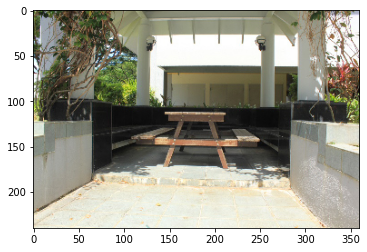

In [54]:
plt.imshow(X_c)